### Лабораторная работа №5
#### Идентификация параметров линейного регрессионного объекта при α− загрязненных шумах

Пусть линейный регрессионный объект имеет вид:
$$ \large y(i)=с_{0}+с_{1}u_{1}(i)+...+с_{4}u_{4}(i)+\eta(i) , $$ 

где шум, действующий на объект, принадлежит классу приближенно нормальных распределений:
$ \large f(\eta) = (1-\alpha)f_N(\eta) + \alpha g(\eta) $ <br>
$ \large f_N(\eta) = \frac{1}{\sqrt{2 \pi} \sigma_\eta} exp(- \frac{\eta^2}{2 \sigma^2_\eta}) $ - нормальное распределение $ \large N(0, \sigma_\eta)$, <br>
$\large \alpha$ - вероятность появление выброса с рапределением $\large g(\eta)$ <br>
$\large g(\eta)$ - вообще говоря какое-то распределение, но в данной лабораторной работе будет нормальным $ \large N(0, \sigma_\eta (outlier))$, но его параметры отличны от $\large f_N(\eta)$

In [1]:
# параметры объекта 
c0=1.5
c1=0.2
c2=-0.1
c3=0.3
c4=1
c_true=[c0,c1,c2,c3,c4]

In [2]:
# количество измерений
N=100

#### Сгенерируем шум, принадлежащий классу приближенно нормальных распределений

In [62]:
import numpy as np
from scipy.stats import rv_continuous
from math import sqrt,pi,exp
from sympy import *
import matplotlib.pyplot as plt

In [63]:
# класс для "загрязненного" распределения
class gaussian_gen(rv_continuous):
    
    def _pdf(self, x, alpha, sigma_1, sigma_2):
        "Gaussian distribution"
        def gaussian(self, x, sigma):
            return np.exp(-x**2 / 2. / sigma**2) / (np.sqrt(2.0 * np.pi)*sigma)
        
        return (1-alpha)*gaussian(self, x, sigma_1)+alpha*gaussian(self, x, sigma_2)

gaussian = gaussian_gen(name='dirty_distrib')

Зададим следующие параметры нашего загрязненного распределения для шума:

In [64]:
# Noise = gaussian.rvs(alpha=0.3, sigma_1=0.5, sigma_2=10, size=N)
# Noise2 = gaussian.rvs(alpha=0.1, sigma_1=0.5, sigma_2=50, size=N)
# Noise3 = gaussian.rvs(alpha=0.1, sigma_1=0.5, sigma_2=100, size=N)
# Noise4 = gaussian.rvs(alpha=0.3, sigma_1=0.5, sigma_2=10, size=N)
# Noise5 = gaussian.rvs(alpha=0.3, sigma_1=0.5, sigma_2=50, size=N)
# Noise6 = gaussian.rvs(alpha=0.3, sigma_1=0.5, sigma_2=100, size=N)

#### Посмотрим на сгенерированный шум и увидим "выбросы" из другого распределения

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

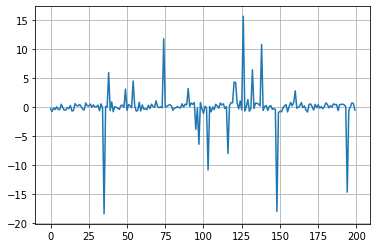

In [67]:
plt.plot(Noise)
plt.grid()

#### Зададим параметры входов объекта и смоделируем выход объекта

In [68]:
#Ваш код здесь
arg=1
var=30
Avg_U1=arg
Var_U1=var
Avg_U2=arg
Var_U2=var
Avg_U3=arg
Var_U3=var
Avg_U4=arg
Var_U4=var

In [69]:
#Ваш код здесь
N=100
U1=np.random.normal(Avg_U1, Var_U1, N)
U2=np.random.normal(Avg_U2, Var_U2, N)
U3=np.random.normal(Avg_U3, Var_U3, N)
U4=np.random.normal(Avg_U4, Var_U4, N)
X = np.array([np.ones(N),U1,U2,U3,U4]).T

### Эффективность алгоритма Хубера vs Рекуррентным МНК при различных статистических характеристиках распределений

В лабораторной работе требуется:

1. Реализовать __class Huber__ c методами: <br>
   * в конструкторе класса небходимо задать:<br>
     1) λ в формуле задания начального приближения матрицы Г(0) = λ*I <br>
    2) параметр $ \xi $, участвующий в функции потерь Хьюбера, в зависимости от вероятности появления выброса $ \alpha $ (значения которого приведены в описании ЛР) <br><br>
   *   __def fit(X, y, c0)__ - метод реализует алгоритм итерационного оценивания параметов объекта с использованием функции потерь Хьюбера:<br>
        <br>
        Input:<br>
            X - матрица входов объекта, [X] = m x N <br>
            y - вектор выходов объекта, [y] = N <br>
            с0 - вектор начального приближения, [c0] = m <br>
        <br>       
   * __def get_coefs()__ - метод возвращает массив коэффициентов оценок вектора параметров объекта, получаемого на каждом новом шаге измерений<br>
        <br>
        Output:<br>
            c_estim_huber - массив оценок параметров объекта, полученный в результате работы метода fit<br><br>
2. Реализовать __class RecurrentMLS__ с методами: <br>

    * в конструкторе класса небходимо задать:<br>
     1) λ в формуле задания начального приближения матрицы Г(0) = λ*I <br><br>

    * __def fit(X, y, c0)__ - метод реализует алгоритм итерационного оценивания параметов объекта с использованием квадратичной функции потерь (см. 2 лабораторную работу):<br>
         <br>
     Input:<br>
             X - матрица входов объекта, [X] = m x N<br>
             y - вектор выходов объекта, [y] = N<br>
             с0 - вектор начального приближения, [c0] = m+1<br><br>
        
    * __def get_coefs()__ - метод возвращает массив коэффициентов оценок вектора параметров объекта, получаемого на каждом новом шаге измерений<br>
        <br>
        Output:<br>
            c_estim_recMLS - массив оценок параметров объекта, полученный в результате работы метода fit<br><br>        
3. Реализовать функцию __smooth_errors(c_estim, c_true)__  - вычисляет сглаженную ошибку оценки по 10 измерениям. <br>
         Input: 
             c_estim - массив оценок параметров объекта, [c_estim] = m+1 x N
             c_true - вектор истинных параметров объекта, [c_true] = m+1 
         Output:
             err - массив сглаженных ошибок оценки
              
4. Провести исследование эффективности алгоритма Хубера по сравнению с рекуррентным МНК алгоритмом при следующих статистических характеристиках распределений:<br>
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.1    $\sigma_\eta (outlier)$ = 10;
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.1    $\sigma_\eta (outlier)$ = 50;
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.1    $\sigma_\eta (outlier)$ = 100;
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.3    $\sigma_\eta (outlier)$ = 10;
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.3    $\sigma_\eta (outlier)$ = 50;
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.3    $\sigma_\eta (outlier)$ = 100. <br><br>
5. Построить графики сходимости сглаженной ошибки оценки по двум алгоритмам: алгоритм с использованием теоремы Хубера и рекуррентный алгоритм, соответствующий методу наименьших квадратов. Сдалать выводы.

### Hints

1. Рекуррентный алгоритм при функции потерь Хьюбера имеет вид:
\begin{equation} \large \hat{\vec{c}}(i)=\hat{\vec{c}}(i-1)+Г(i)d(\varepsilon(i, \hat{\vec{c}}(i-1)))\vec{z}(i) \\
\large Г(i)=Г(i-1)-\frac{Г(i-1)\vec{z}(i)\vec{z}(i)^TГ(i-1)}{I^{-1}_F+\vec{z}^T(i)Г(i-1)\vec{z}(i)} \\
\large Г(0)=\lambda I, \lambda >> 1,  \hat{\vec{c}}(0)=\vec{c}_{0}\end{equation}

где $ \large  \Delta = \xi\sigma_\eta$
\begin{equation} \large d(\varepsilon(i, \hat{\vec{c}}(i-1)))=\frac{dF(\varepsilon(i, \hat{\vec{c}}(i-1)))}{d\varepsilon}|_{\varepsilon = \varepsilon(i, \hat{\vec{c}}(i-1)))}= \left\{
    \begin{array}\\
        -\Delta, & \varepsilon(i) \leq -\Delta \\
        \varepsilon(i, \hat{\vec{c}}(i-1))), & -\Delta \leq |\varepsilon(i)| \leq \Delta\\
        \Delta, &  \varepsilon(i) \geq \Delta
    \end{array}  
\right.\end{equation}

\begin{equation} \large  I_F=2(1-\alpha)\frac{\Delta}{\sigma^2_\eta}f_N(\frac{\Delta}{\sigma_\eta})+(1-\alpha)\frac{1}{\sqrt{2\pi}\sigma_\eta}\frac{1}{\sigma^4_\eta}\int_{-\Delta}^\Delta \eta^2exp(\frac{-\eta^2}{2\sigma^2_\eta})d\eta\end{equation}

2. Для вычислении информации Фишера можно использовать модуль __sympy__ (https://docs.sympy.org/latest/modules/integrals/integrals.html)

In [72]:
class Huber:
    
    def __init__(self,alpha,arg_nu=0.5,Lambda=0.1):
        self.Lambda = Lambda
        alpha_psi = {0.3:1.1,0.1:0.9}
        self.psi = alpha_psi[alpha]
        self.delta = self.psi*arg_nu
#         для ускорения посчитала заранее,формула ниже
        inf_Fisher = {0.1:1.062131,0.3:0.9168241401}
        self.I = inf_Fisher[alpha]
#         self.I = float(2*(1-alpha)*self.delta*self.fN(self.delta/arg_nu,arg_nu)/arg_nu**2+(1-alpha)/(sqrt(2*pi)*arg_nu*arg_nu**4)*self.integ_for_fisher(-self.delta,self.delta,arg_nu))
        
    def integ_for_fisher(self,a,b,arg_nu):

        x = Symbol('x')
        return float(integrate(x*x*exp(-x**2/(2*arg_nu**2)), (x,a,b)))
    
    def fN(self,x, arg_nu=0.5):
        return float(exp(-0.5*((x/arg_nu)**2)) / (arg_nu * sqrt(2*pi)))

    def fit(self,X,y,c0):   
        self.X = X
        self.y = y
        N = y.shape[0]
        n = len(X[0])
        G = np.eye(n) * self.Lambda
        self.coef = np.empty([N,n])
        self.coef[0] = np.array(c0)

        
        for i in range(N):
            z=X[i].reshape(-1,1)  
            G = G - G@z@z.T@G/(1/self.I+z.T@G@z)
            self.coef[i] = self.coef[i-1]+(self.d(i)*G@z).reshape(-1,)
            
          
    def d(self,i):
        eps = self.y[i] - self.X[i]@self.coef[i-1]
        if eps<=-self.delta:
            return -self.delta
        elif eps>=self.delta:
            return self.delta
        else:
            return eps
        
        
    def get_coefs(self):
        return self.coef[::]

In [73]:
class RecurrentMLS:
    def __init__(self,Lambda=0.1):
        self.Lambda=Lambda
    
    def fit(self,X,y,c0):
        self.X = X
        self.y = y
        N = y.shape[0]
        n = len(X[0])
        G = np.eye(n) * self.Lambda
        self.coef = np.empty([N,n])
        self.coef[0] = np.array(c0)

        for i in range(1,N):
            z=X[i].reshape(-1,1)   
            K = G@z
            G = G - G@z@z.T@G/(1+z.T@G@z)
            self.coef[i]=self.coef[i-1]+ (K*(y[i]-z.T@self.coef[i-1])).reshape(5,)
                        
    def get_coefs(self):
        return self.coef[::]
    

In [74]:
def smooth_errors(c_estim, c_true):
    err=[]
    N=len(c_estim)
    for i in range(10,N):
        x=0
        for j in range(1,10):
            for k in range(0,4):
                x+=(c_true[k]-c_estim[i-j][k])**2
        err.append(np.sqrt(x/10))
    return err

**Research**

In [194]:
c_=[1.4,0.3,0,0,1.1]
N=200
U1=np.random.normal(Avg_U1, Var_U1, N)
U2=np.random.normal(Avg_U2, Var_U2, N)
U3=np.random.normal(Avg_U3, Var_U3, N)
U4=np.random.normal(Avg_U4, Var_U4, N)
X = np.array([np.ones(N),U1,U2,U3,U4]).T

In [233]:
alpha = 0.1
sigma_1 = 0.5
sigma_2 = 10
Noise = gaussian.rvs(alpha, sigma_1, sigma_2, size=N)
y=c0+c1*U1+c2*U2+c3*U3+c4*U4+Noise

# plt.plot(y)
# plt.grid()

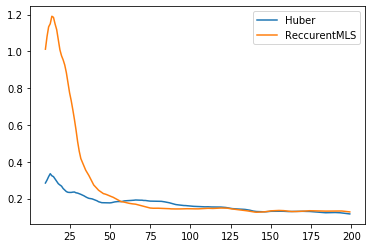

In [235]:
h = Huber(alpha,sigma_1,Lambda=10)
h.fit(X,y,c_)
c_estim=h.get_coefs()
err_h =  smooth_errors(c_estim,c_true)

r = RecurrentMLS(Lambda=0.001)
r.fit(X,y,c_)
c_estim=r.get_coefs()
err_r =  smooth_errors(c_estim,c_true)

t = range(10,N)
# plt.title('sigma_nu  = 0.5  alpha  = 0.1  sigma_nu(outlier)  = 10')
plt.plot(t, err_h, label = 'Huber')
plt.plot(t, err_r, label = 'ReccurentMLS')
plt.legend()
plt.show()
